In [1]:
using BenchmarkTools, JLD2, CairoMakie, ImageFiltering

include("src/adjoint.jl")
include("src/solver.jl")
include("src/forward.jl")


forward_acoustic_c (generic function with 1 method)

In [2]:
# DEMO 1: square domain
Nx = 401
Ny = 401
dx = 10
dy = 10
Nt = 2000
Fs = 300
dt = 1/Fs
t = range(0, (Nt-1)*dt, Nt)
pml_len = 100
pml_coef = 100

rho = 1 .* ones(myReal, Nx, Ny)
c = 1000 .* ones(myReal, Nx, Ny)
c[150:250,150:250] .= 1200
c0 = 1000 .* ones(myReal, Nx, Ny)

source_num = 9
source_position = zeros(2,source_num)
for i = 1:source_num
    source_position[1,i] = 1
    source_position[2,i] = 1 + (i-1)*51
end
source_vals = zeros(Nt, source_num)
for i = 1:source_num
    source_vals[:,i] = source_ricker_int(8,0.2,t) * 1e6
end

receiver_num = 401
receiver_position = zeros(2, receiver_num)
for i = 1:receiver_num
    receiver_position[1,i] = 401
    receiver_position[2,i] = (i-1)*1 + 1
    # receiver_position[2,i] = 201
end

idx = 5
blockx=16
blocky=16

data = forward_acoustic_c(c, Nx, Ny, Nt, dx, dy, dt, source_num, source_position, source_vals, receiver_num, receiver_position, pml_len, pml_coef; blockx=16, blocky=16, idx_source=0, recordWaveField=false, saveRatio=1);

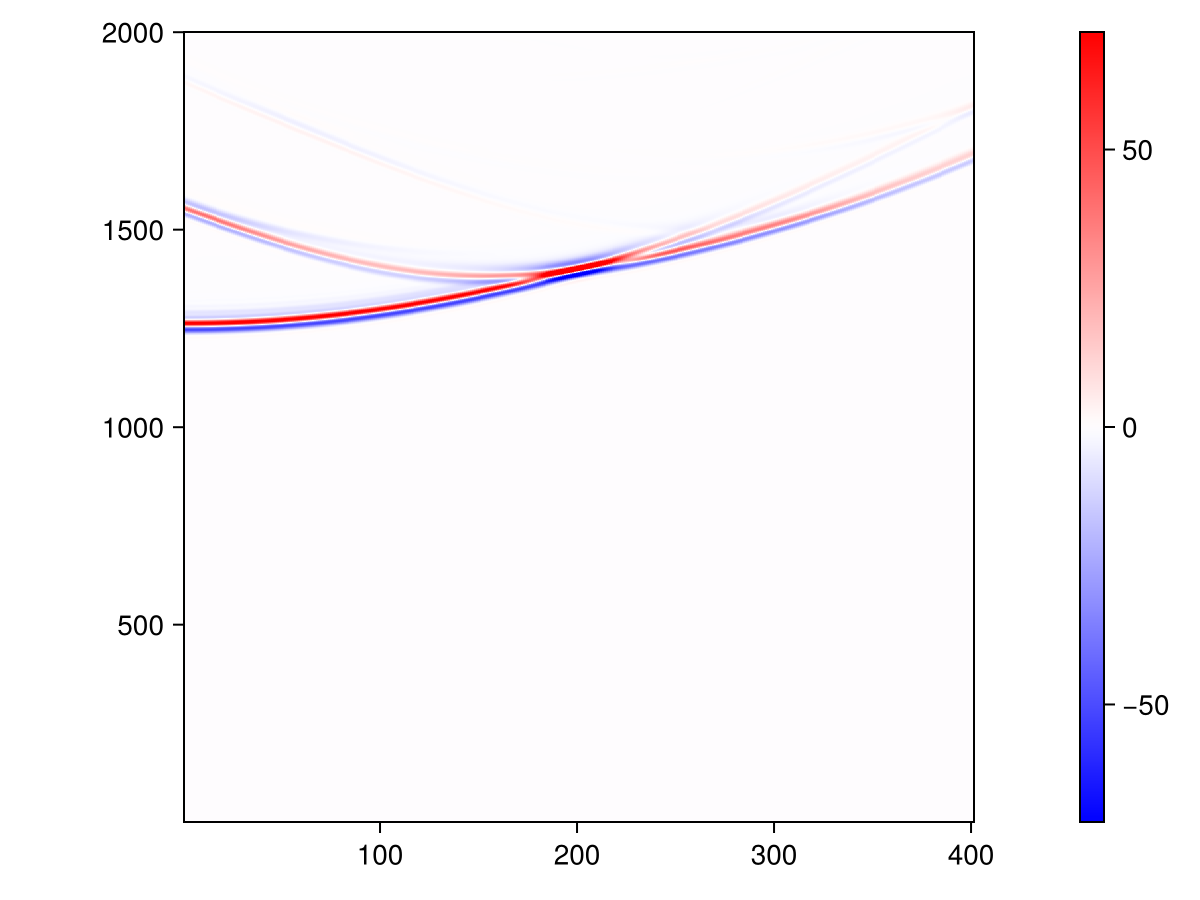

In [3]:
img = Array{myReal}(data[:,:,1]')
val = maximum(img) * 0.5
f, ax, hm = heatmap(img, colormap=:bwr, colorrange=(-val,val); axis=(; aspect=1), figure=(;figsize=(800,600)))
Colorbar(f[1,2], hm)
f

In [14]:
@time gg1 = adjoint_c(data, c0, Nx, Ny, Nt, dx, dy, dt, source_num, source_position, source_vals, receiver_num, receiver_position, pml_len, pml_coef; blockx=16, blocky=16, saveRatio=1)

@time gg2 = adjoint_c(data, c0, Nx, Ny, Nt, dx, dy, dt, source_num, source_position, source_vals, receiver_num, receiver_position, pml_len, pml_coef; blockx=16, blocky=16, saveRatio=2)

@time gg3 = adjoint_c(data, c0, Nx, Ny, Nt, dx, dy, dt, source_num, source_position, source_vals, receiver_num, receiver_position, pml_len, pml_coef; blockx=16, blocky=16, saveRatio=3)

 12.910861 seconds (13.55 M allocations: 698.188 MiB, 0.42% gc time)
 12.485841 seconds (11.20 M allocations: 635.981 MiB, 0.32% gc time)
 12.152457 seconds (10.41 M allocations: 615.203 MiB, 0.29% gc time)


401×401 Matrix{Float32}:
 0.0   0.0           0.0          …   0.0           0.0          0.0
 0.0  -0.000325091  -0.000324482     -0.000122166  -0.000167603  0.0
 0.0  -0.000280272  -0.000252802     -0.000178854  -0.000212356  0.0
 0.0  -0.000272283  -0.000226237     -0.000207465  -0.000225698  0.0
 0.0  -0.000271351  -0.000220528     -0.000212623  -0.00021756   0.0
 0.0  -0.000269983  -0.000222334  …  -0.000202645  -0.000198606  0.0
 0.0  -0.000266222  -0.000225786     -0.000185302  -0.000176692  0.0
 0.0  -0.000259487  -0.000228266     -0.00016614   -0.000156388  0.0
 0.0  -0.000249679  -0.000228553     -0.000148431  -0.000139782  0.0
 0.0  -0.000236937  -0.000226089     -0.000133741  -0.000127452  0.0
 ⋮                                ⋱                              ⋮
 0.0  -9.57467f-6   -1.36708f-5      -1.03296f-5   -5.42635f-6   0.0
 0.0  -1.17009f-5   -1.57133f-5      -1.28094f-5   -7.84853f-6   0.0
 0.0  -1.3832f-5    -1.76755f-5      -1.53223f-5   -1.03755f-5   0.0
 0.0  -1.59

In [20]:
@time gg4 = adjoint_c(data, c0, Nx, Ny, Nt, dx, dy, dt, source_num, source_position, source_vals, receiver_num, receiver_position, pml_len, pml_coef; blockx=16, blocky=16, saveRatio=4)

@time gg5 = adjoint_c(data, c0, Nx, Ny, Nt, dx, dy, dt, source_num, source_position, source_vals, receiver_num, receiver_position, pml_len, pml_coef; blockx=16, blocky=16, saveRatio=5)

 12.091468 seconds (10.02 M allocations: 604.937 MiB, 0.59% gc time)
 12.271192 seconds (9.80 M allocations: 598.792 MiB, 0.27% gc time)


401×401 Matrix{Float32}:
 0.0   0.0           0.0          …   0.0           0.0          0.0
 0.0   0.000248502   9.32014f-5      -0.000335467  -0.000357694  0.0
 0.0   0.00017089    0.000153887     -0.000328773  -0.000317412  0.0
 0.0   7.70008f-5    0.000132429     -0.000279689  -0.000244578  0.0
 0.0  -2.52401f-6    8.635f-5        -0.00021203   -0.000165409  0.0
 0.0  -6.84938f-5    3.50664f-5   …  -0.000143397  -9.51236f-5   0.0
 0.0  -0.000123546  -1.52636f-5      -8.3458f-5    -3.96573f-5   0.0
 0.0  -0.000169313  -6.24271f-5      -3.58346f-5    5.23322f-7   0.0
 0.0  -0.000206712  -0.000105416     -6.46941f-7    2.73384f-5   0.0
 0.0  -0.000236291  -0.000143635      2.35503f-5    4.33185f-5   0.0
 ⋮                                ⋱                              ⋮
 0.0  -1.87942f-5   -2.00783f-5      -2.53549f-5   -2.10526f-5   0.0
 0.0  -1.96168f-5   -1.98191f-5      -2.65737f-5   -2.3081f-5    0.0
 0.0  -1.98214f-5   -1.87992f-5      -2.729f-5     -2.46991f-5   0.0
 0.0  -1.92

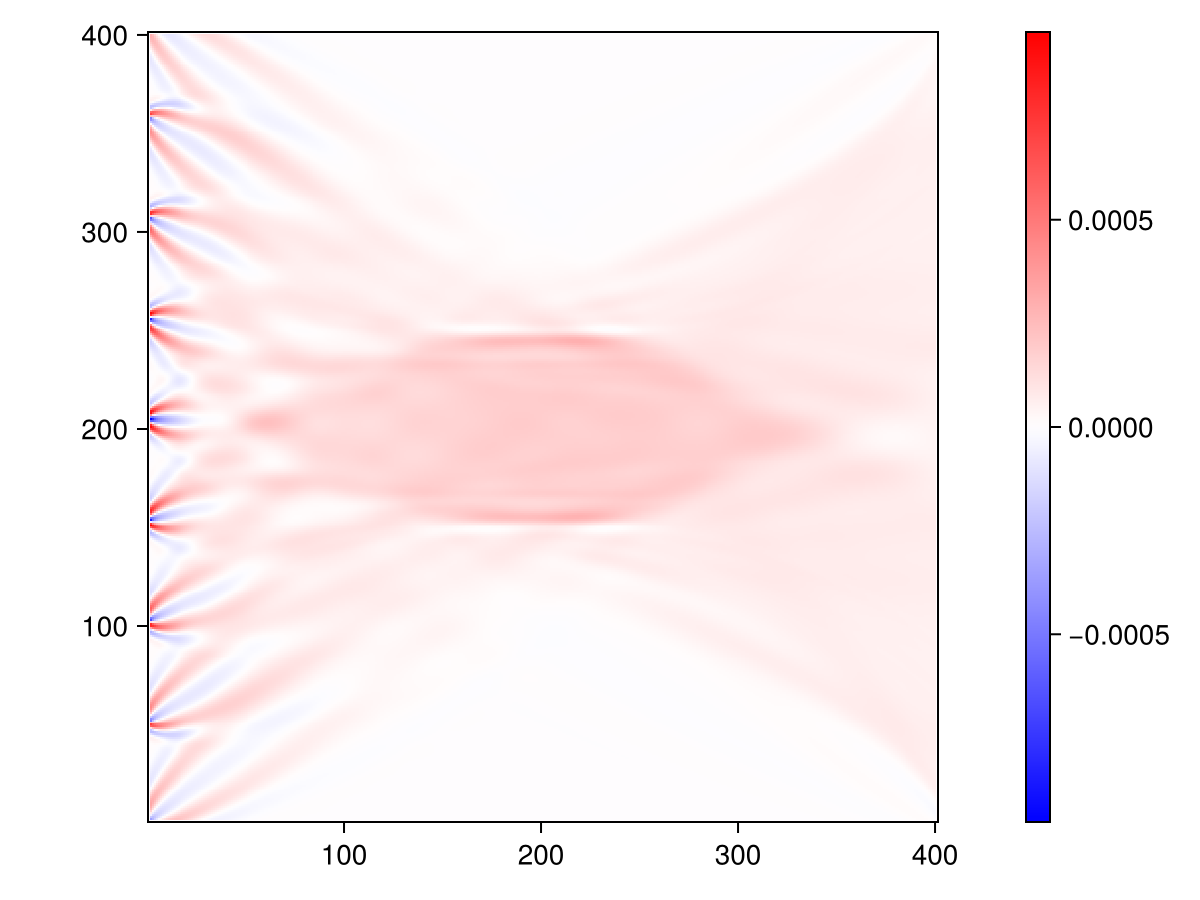

In [22]:
img = Array{myReal}(gg1-gg5)
val = maximum(img)
f, ax, hm = heatmap(img, colormap=:bwr, colorrange=(-val,val); axis=(; aspect=DataAspect()), figure=(;figsize=(800,600)))
Colorbar(f[1,2], hm)
f

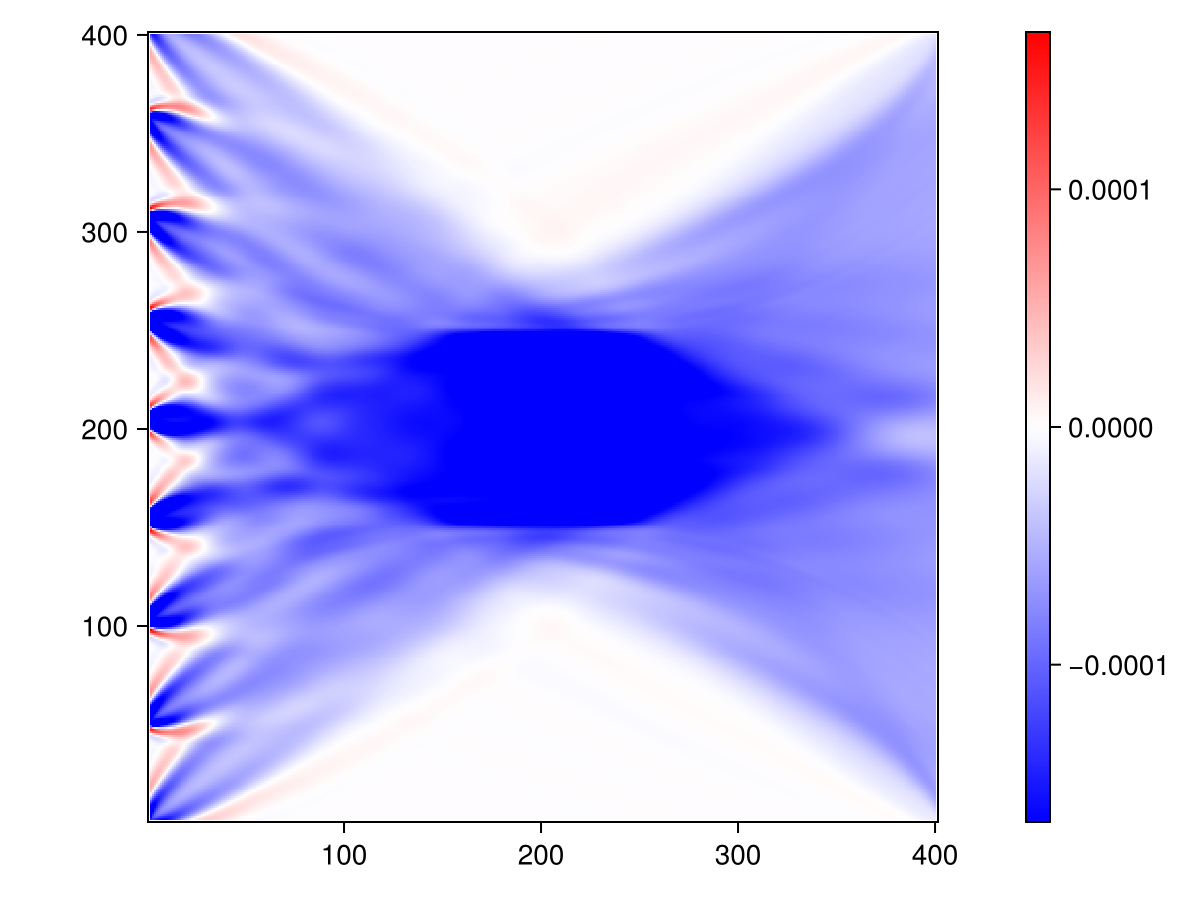

In [18]:
img = Array{myReal}(gg2)
val = maximum(img)
f, ax, hm = heatmap(img, colormap=:bwr, colorrange=(-val,val); axis=(; aspect=DataAspect()), figure=(;figsize=(800,600)))
Colorbar(f[1,2], hm)
f

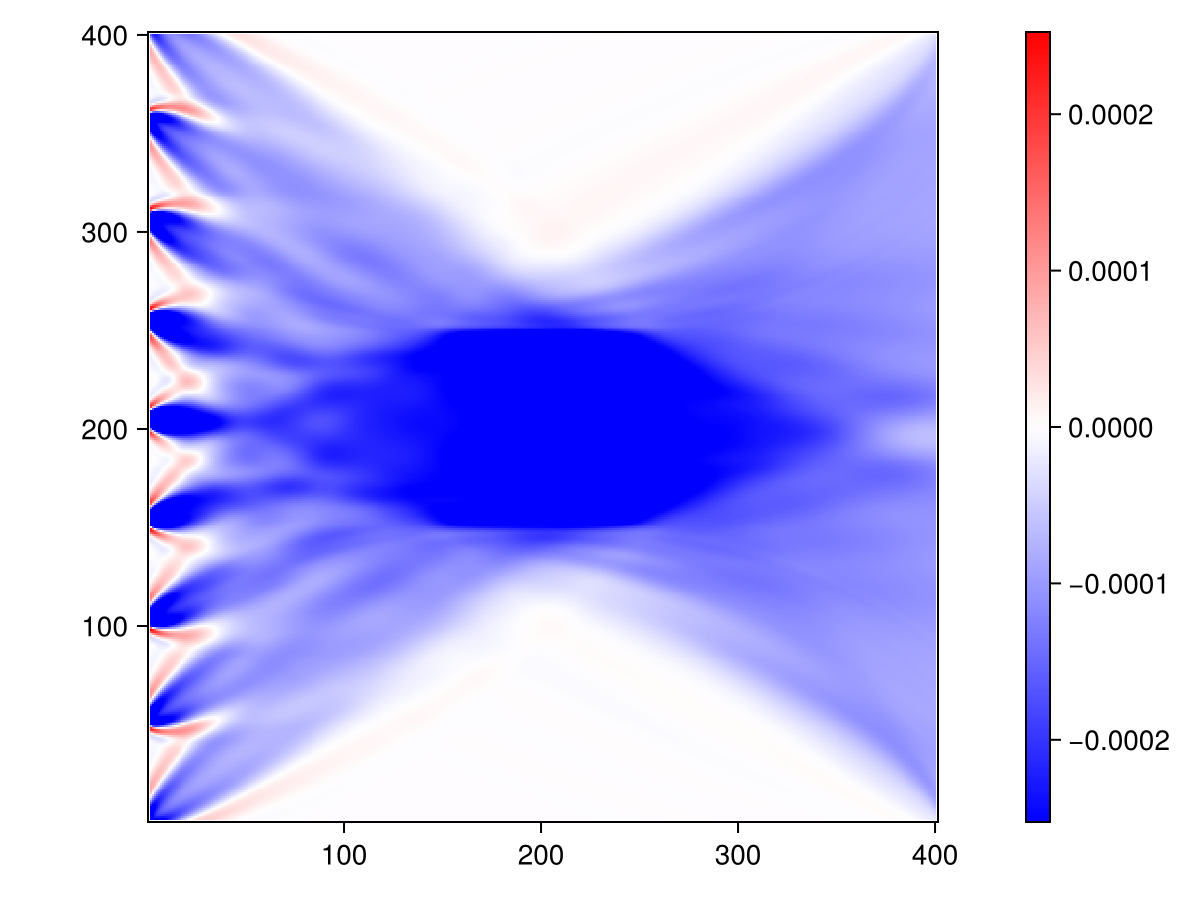

In [19]:
img = Array{myReal}(gg3)
val = maximum(img)
f, ax, hm = heatmap(img, colormap=:bwr, colorrange=(-val,val); axis=(; aspect=DataAspect()), figure=(;figsize=(800,600)))
Colorbar(f[1,2], hm)
f

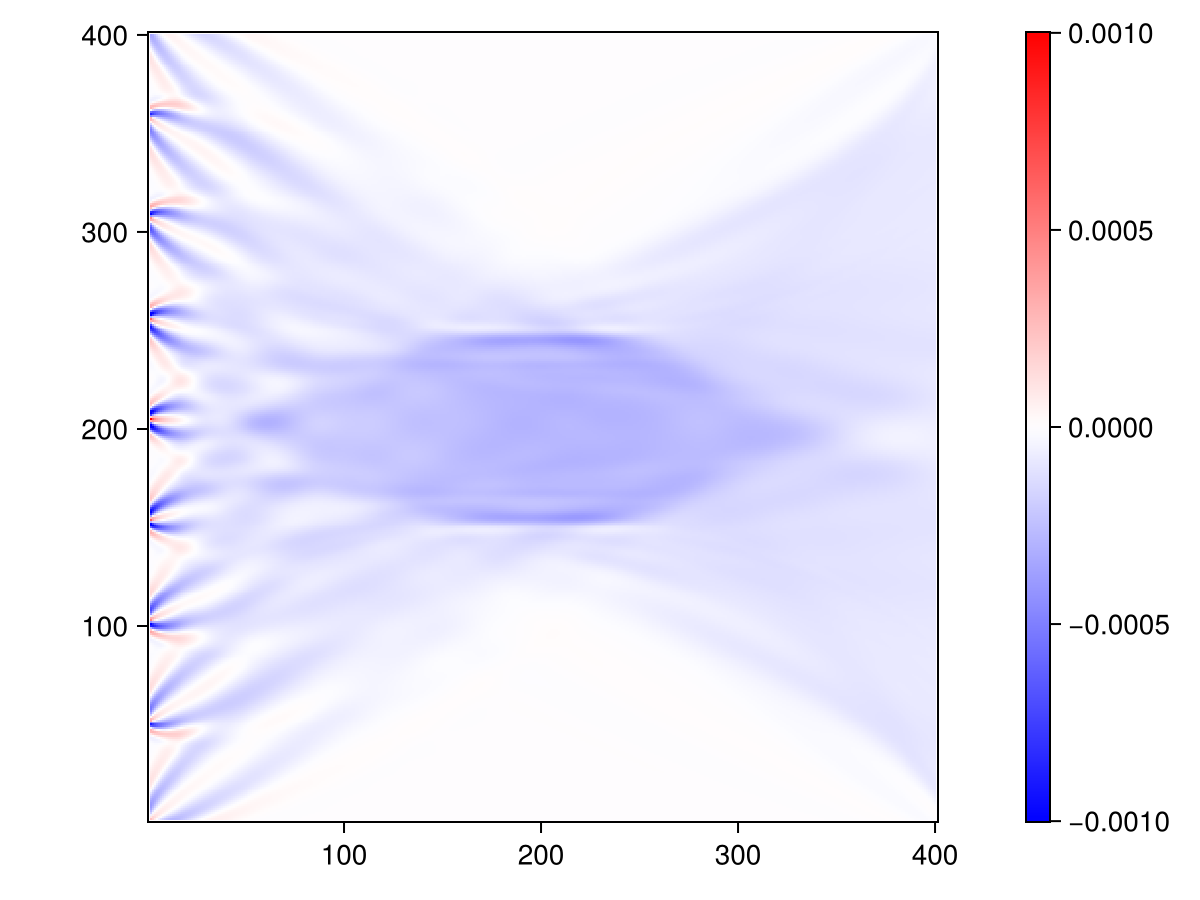

In [24]:
img = Array{myReal}(gg5)
val = maximum(img)
f, ax, hm = heatmap(img, colormap=:bwr, colorrange=(-val,val); axis=(; aspect=DataAspect()), figure=(;figsize=(800,600)))
Colorbar(f[1,2], hm)
f

(175, 850)


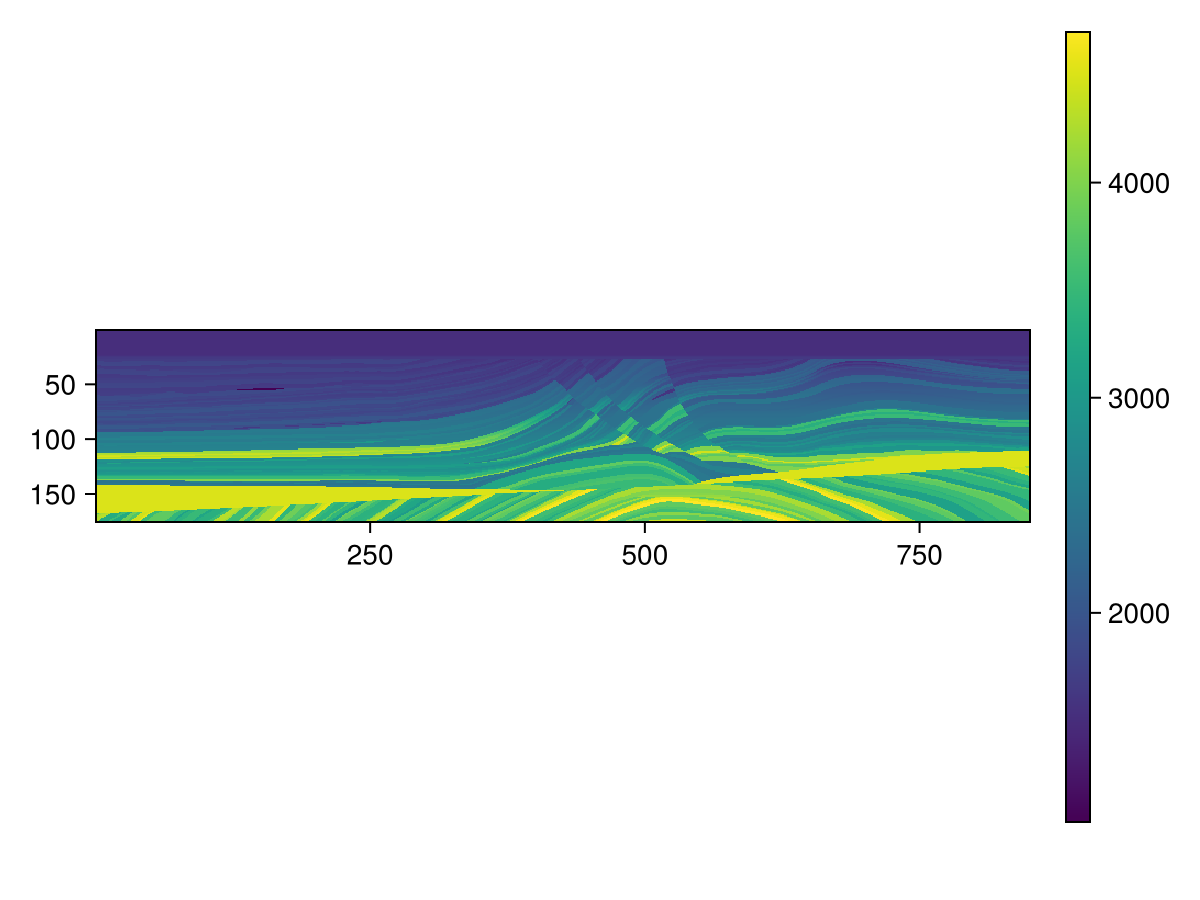

In [2]:
# DEMO 2: Marmousi
@load "data/marmousi/marmousi20.jld2"
c = 1000 .* c
rho = 1000 .* rho

Nx, Ny = size(c)
println(size(c))
dx, dy = 20, 20
Nt = 4000
Fs = 500
dt = 1/Fs
t = range(0, (Nt-1)*dt, Nt)
pml_len = 100
pml_coef = 200

a = 1 ./ rho
b = rho .* c .^ 2;

source_num = 15
source_position = zeros(2,source_num)
for i = 1:source_num
    source_position[1,i] = 5
    source_position[2,i] = 51 + (i-1)*51
end
source_vals = zeros(Nt, source_num)
for i = 1:source_num
    source_vals[:,i] = source_ricker_int(5,0.2,t) * 1e6
end

receiver_num = 425 * 2
receiver_position = zeros(2, receiver_num)
for i = 1:receiver_num
    receiver_position[1,i] = 1
    receiver_position[2,i] = (i-1)*1 + 1
end

img = Array{myReal}(c')
f, ax, hm = heatmap(img, colormap=:viridis; axis=(; aspect=DataAspect(), yreversed=true), figure=(;figsize=(800,600)))
Colorbar(f[1,2], hm)
f

In [3]:
c[1:24,1]

24-element Vector{Float64}:
 1500.0
 1500.0
 1500.0
 1500.0
 1500.0
 1500.0
 1500.0
 1500.0
 1500.0
 1500.0
    ⋮
 1500.0
 1500.0
 1500.0
 1500.0
 1500.0
 1500.0
 1500.0
 1500.0
 1531.9995880126953

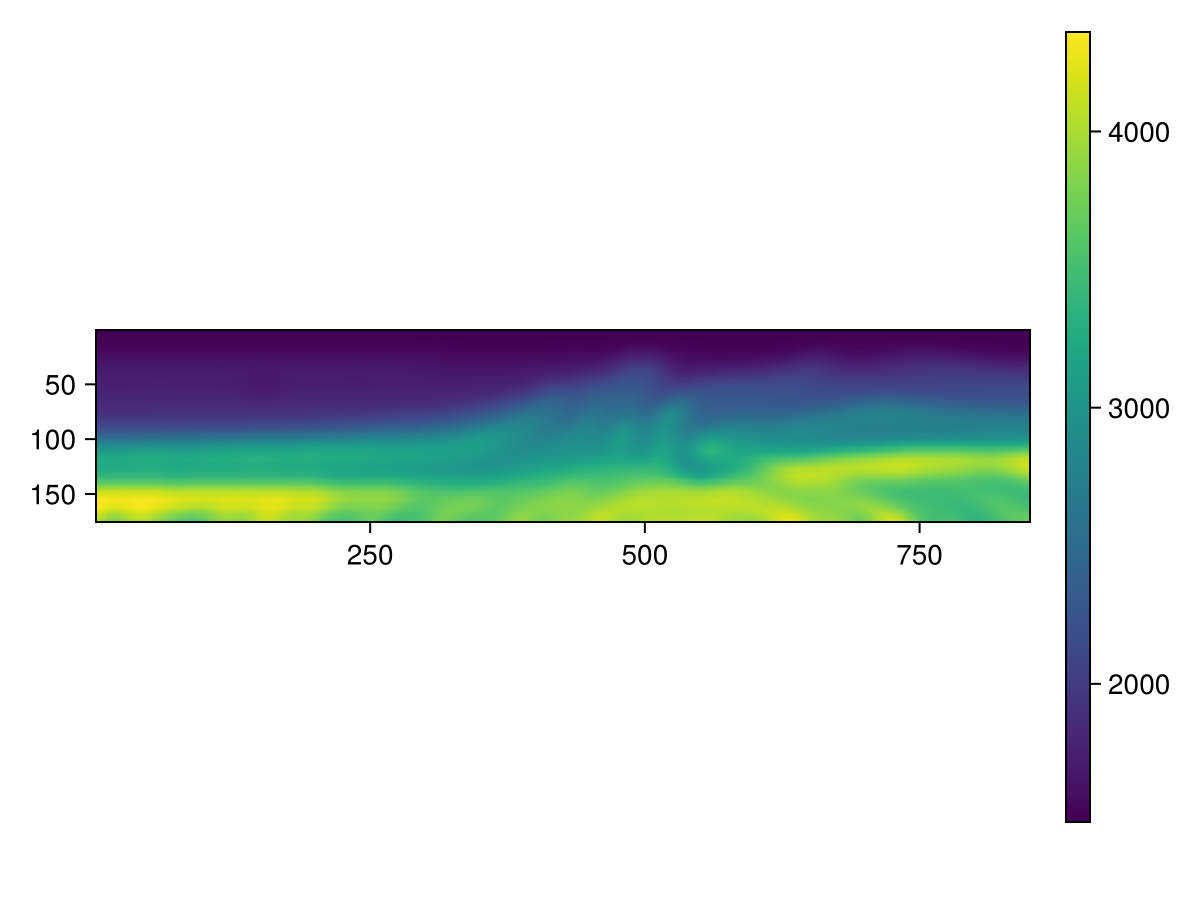

In [4]:
c0 = imfilter(c, Kernel.gaussian(10));
img = Array{myReal}(c0')
f, ax, hm = heatmap(img, colormap=:viridis; axis=(; aspect=DataAspect(), yreversed=true), figure=(;figsize=(800,600)))
Colorbar(f[1,2], hm)
c0[1:23,:] .= 1500.
f

In [5]:
data = forward_acoustic_c(c, Nx, Ny, Nt, dx, dy, dt, source_num, source_position, source_vals, receiver_num, receiver_position, pml_len, pml_coef; blockx=16, blocky=16, idx_source=0, recordWaveField=false, saveRatio=1);

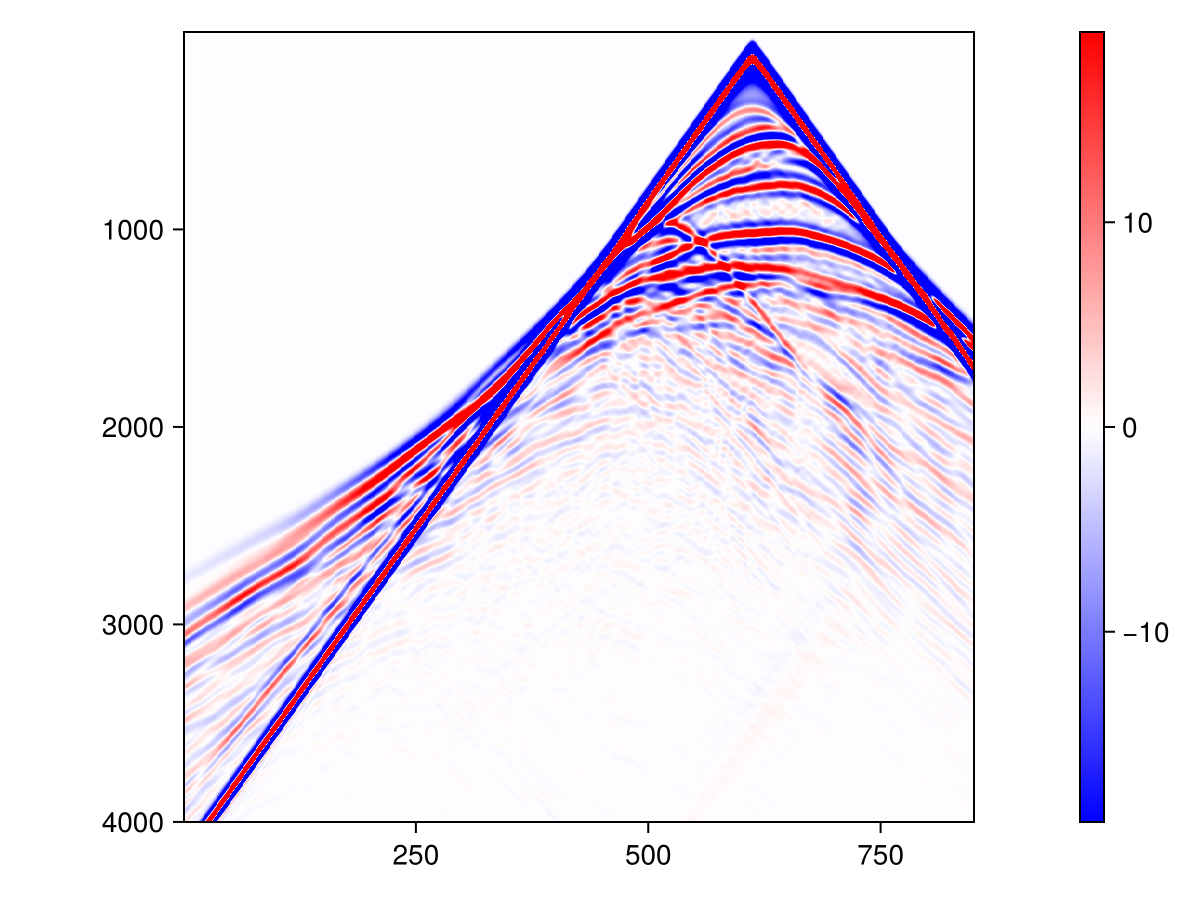

In [6]:
img = Array{myReal}(data[:,:,12]')
val = maximum(img) * 0.02
f, ax, hm = heatmap(img, colormap=:bwr, colorrange=(-val,val); axis=(; aspect=1, yreversed=true), figure=(;figsize=(800,600)))
Colorbar(f[1,2], hm)
f

In [9]:
@time gg = adjoint_c(data, c0, Nx, Ny, Nt, dx, dy, dt, source_num, source_position, source_vals, receiver_num, receiver_position, pml_len, pml_coef; blockx=16, blocky=16)

 30.190321 seconds (44.69 M allocations: 1.985 GiB, 2.75% gc time)


175×850 Matrix{Float32}:
 0.0   0.0          0.0          0.0         …   0.0          0.0         0.0
 0.0  -6.93886f-6  -9.57955f-6  -1.23384f-5     -1.27284f-5  -9.71604f-6  0.0
 0.0  -5.48942f-6  -7.31789f-6  -9.2263f-6      -1.00706f-5  -7.36855f-6  0.0
 0.0  -5.09405f-6  -6.40042f-6  -7.59855f-6     -7.98501f-6  -5.41363f-6  0.0
 0.0  -5.1911f-6   -6.24065f-6  -6.97079f-6     -6.06258f-6  -3.65306f-6  0.0
 0.0  -5.40778f-6  -6.3974f-6   -6.90473f-6  …  -4.27458f-6  -2.19811f-6  0.0
 0.0  -5.49449f-6  -6.54761f-6  -7.03887f-6     -2.81302f-6  -1.24241f-6  0.0
 0.0  -5.3111f-6   -6.48719f-6  -7.11669f-6     -1.90078f-6  -8.79989f-7  0.0
 0.0  -4.81144f-6  -6.13033f-6  -7.00207f-6     -1.61731f-6  -9.97311f-7  0.0
 0.0  -4.01356f-6  -5.48221f-6  -6.65848f-6     -1.80078f-6  -1.27915f-6  0.0
 ⋮                                           ⋱                            
 0.0  -5.653f-9    -5.40318f-9  -5.2484f-9      -2.89916f-8  -3.29409f-8  0.0
 0.0  -6.77575f-9  -6.57474f-9  -6.5539f-9

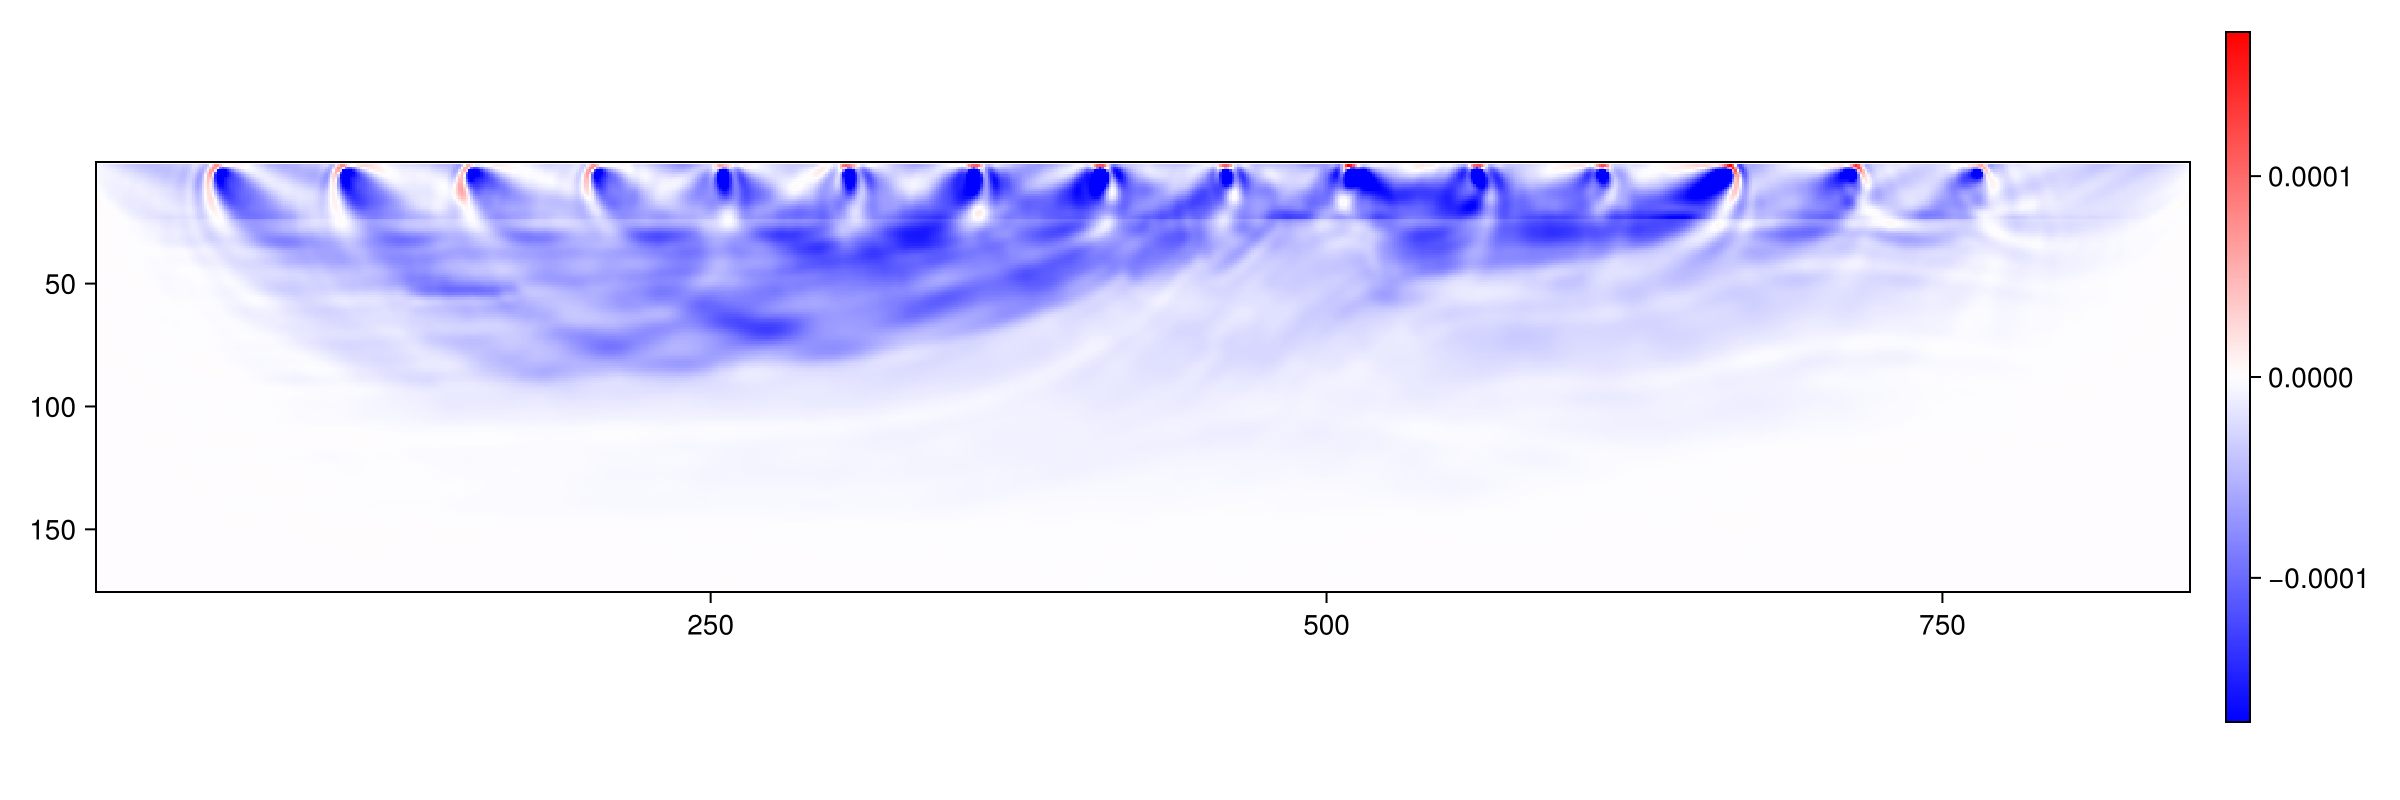

In [8]:
img = Array{myReal}(gg')
val = maximum(img) * 1
f, ax, hm = heatmap(img, colormap=:bwr, colorrange=(-val,val); axis=(; aspect=DataAspect(), yreversed=true), figure=(;size=(1200,400)))
Colorbar(f[1,2], hm)
f

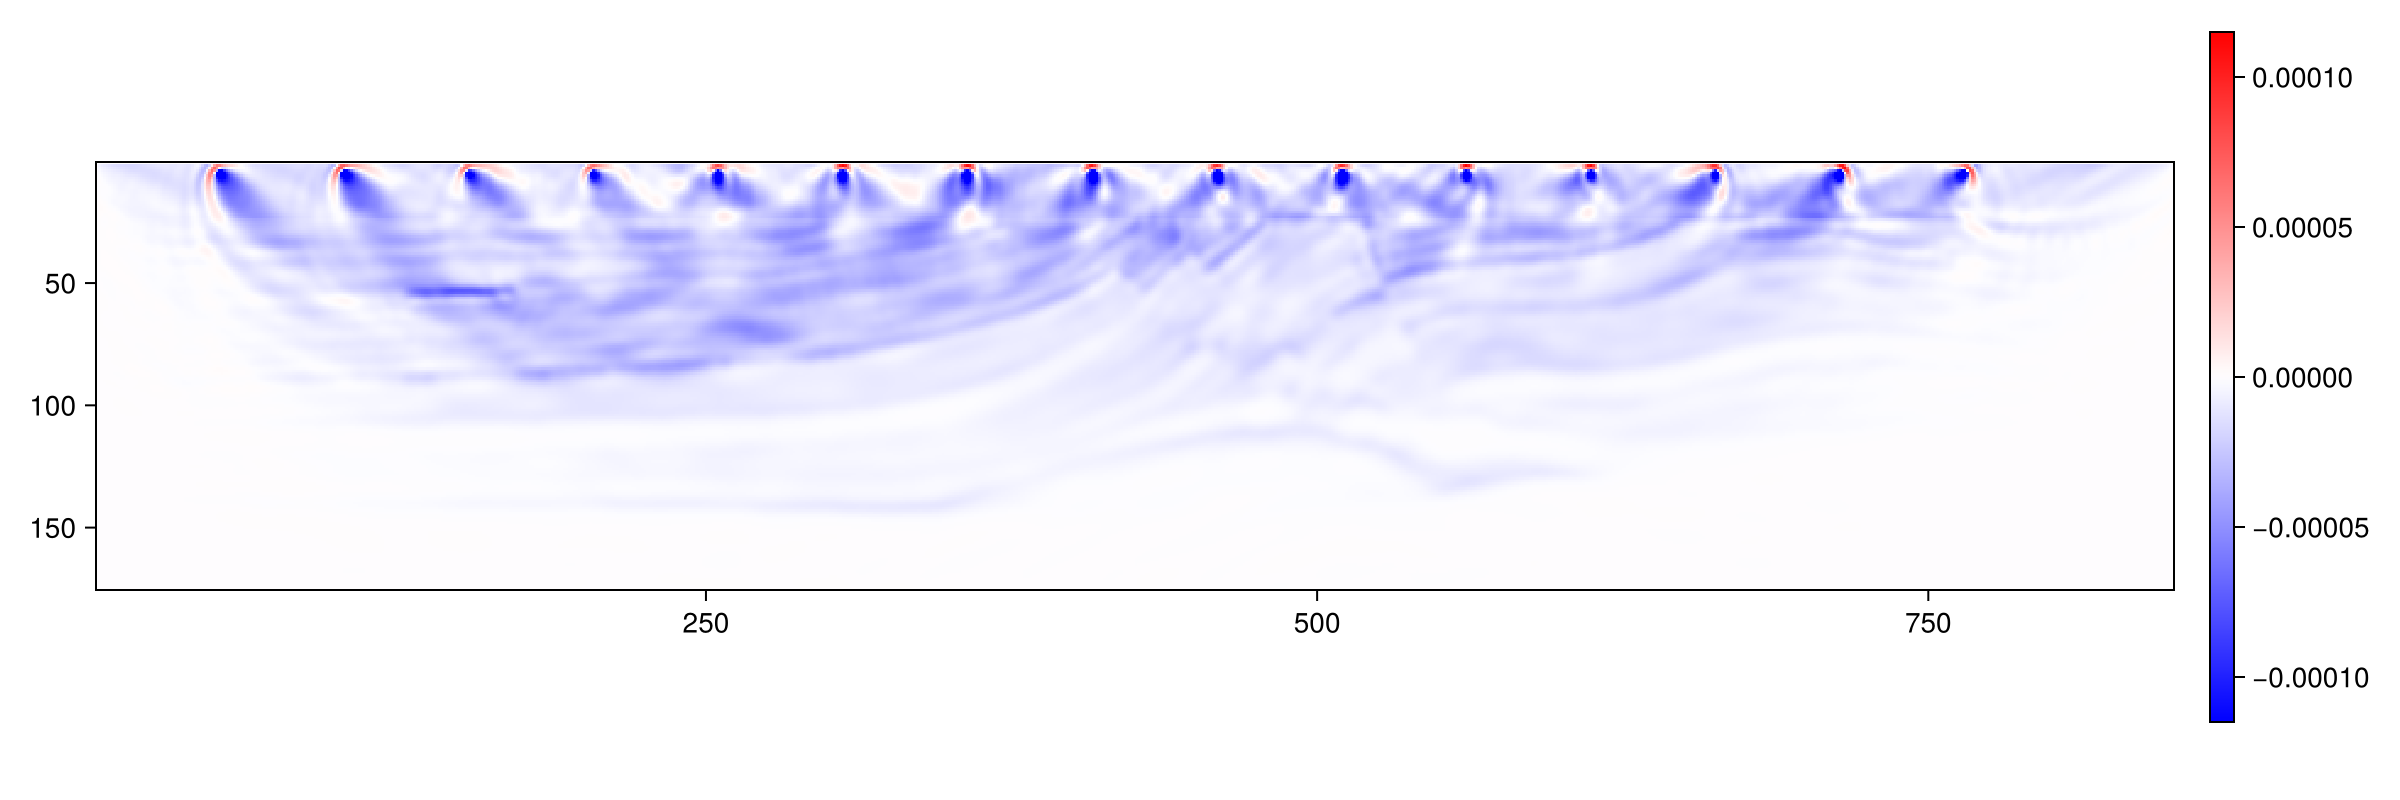

In [94]:
img = Array{myReal}(gg')
val = maximum(img)
f, ax, hm = heatmap(img, colormap=:bwr, colorrange=(-val,val); axis=(; aspect=DataAspect(), yreversed=true), figure=(;size=(1200,400)))
Colorbar(f[1,2], hm)
f

In [79]:
val

1.8540148f-16